In [1]:
import pandas as pd
import numpy as np

# Introduction to Statistics and Indicators in Finance

Many fields in finance rely on some sort of data analysis
- For example fundamental analysis of a business:
    - various numbers from the company itself (i.e. from the balance sheet)
    - indicators representing the overall market 
    
Results drive decisions, e.g. for an investement

There are many well established techniques and statistics for pricing financial products.

Some techniques more prominent since the dawn of powerful algorithms and artificial intelligence


## Returns

In order for an investment to be profitable, the money it yields must be higher than the inital investment made (plus transaction costs).

Assess so called return, usually discrete: relative change in investment value $S$.  

$$ r_t = \frac{S_t - S_{t-1}}{S_{t-1}} =\frac{S_t}{S_{t-1}} - 1 $$ 

Note here that one time step $t$ is of arbitrary length, e.g. daily or monthly


### Additivity

Returns my be based on different time spans $\rightarrow$ aggreagte somehow 

The property we are looking for is called addititvity: sum shorter-scale returns to get the larger-scale returns

Note that we can't just split monthly returns into daily returns, this requires making assumptions on the distribution 

Daily and weekly returns:  
To calculate weekly returns from daily returns, we mustn't use the daily return as is.  

time $t$       |  0   |   1  |   2   |   3    |   4   |   5   |   6   |   7   
-------------|------|------|-------|--------|-------|-------|-------|----------
prices $S_t$  |  100 |  110 |  121  |  110   |  132  |  105  |  112  |   105  
return $r_t$ |  --- | 0.10 |  0.10 |  -0.09 |  0.2  |  -0.20 |  0.07 | -0.06

If we simply added all returns, we'd find a weekly return of $r_{0,7} = 0.12$.  
However, using the formula from above, we find that
$$ r_{0,7} = \frac{S_7}{S_{0}} - 1 = \frac{105}{100} - 1  = 0.05 $$
and conclude that indeed daily returns cannot simply be added up in order to yield the weekly return.

#### log-returns

With a single transformation however, we can can establish the desired additivity over time

The transformation needed is taking the **logarithm** and getting **log returns**

Logarithmise the (daily) **prices** and get the difference between sucessive values.  
Or logarithmise the ratio of the past and current price:
$$ r_t^{log} = \log{\frac{S_t}{S_{t-1}}} $$
$$ \downarrow(\log{\frac{x}{y}} = \log{x}- \log{y})$$
$$ = \log{S_t} - \log{S_{t-1}} $$ 

These log returns/continuous returns, now exhibit additivity over time

same prices, but log returns:

time $t$       |  0   |   1  |   2   |   3    |   4   |   5   |   6   |   7   
-------------|------|------|-------|--------|-------|-------|-------|----------
prices $S_t$  |  100 |  110 |  121  |  110   |  132  |  105  |  112  |   105  
log return $r_t^{log}$ |  --- | 0.10 |  0.10 |  -0.10 |  0.18  |  -0.23 |  0.06 | -0.06

Add all log returns to find weekly log return to be $$ r_{0,7} = 0.05 $$.  

To convert log returns to discrete returns, take the exponent (inverse of the logarithm) of the log return **and subtract 1**.  
Here, we also get a result of $0.05$  

Having a look at the math with logarithmised prices, we can unveil the characteristics of this additive behaviour:
$$ r_{t=2}^{log} =\log{\frac{S_t}{S_{t-1}}} = \log{S_{t=2} - \log{S_{t=0}}} $$  
$$\downarrow \text{"add zero": } - \log{S_{t=1}} + \log{S_{t=1}} = 0 $$  
$$ r_{0, t=2}^{log} =\log{S_{t=2} + 0 - \log{S_{t=0}}} $$  
$$ r_{0, t=2}^{log} = (\log{S_{t=2} - \log{S_{t=1}}) + (\log{S_{t=1}} - \log{S_{t=0}}}) $$  
$$ r_{0, t=2}^{log} = r_{1, t=2}^{log} + r_{0, t=1}^{log} $$

We notice that log returns are very close to the discrete returns.  
This is due to the fact, the logarithm behaves almost linear for values close to zero.

$\rightarrow$ for small values of the discrete return, the log returns are very similar. 

Note that this applies almost always for daily returns and even shorter time spans. 

For a monthly return (or quarterly, yearly) there "is more time for the value to develop"

Let's have a look at returns using python

In [13]:
df = pd.DataFrame({
    'S': [100, 110, 121, 110, 132, 105, 112, 105],
    },
index=list(range(8)))
df

,S
0,100
1,110
2,121
3,110
4,132
5,105
6,112
7,105


We can calculate discrete returns simply by using a method of a Series object: `.pct_change()`.  
Note the `NaN` value for the first line.

To calculate log returns with numpy's `np.log()`

In [14]:
# use prices
df['discrete_returns'] = df.S.pct_change()
df['log_returns'] = np.log(df.S).diff()
df['log_returns_alt'] = np.log(df.discrete_returns.dropna()+1)
df['discrete_returns_from_log'] = np.exp(df.log_returns) - 1
df

,S,discrete_returns,log_returns,log_returns_alt,discrete_returns_from_log
0,100,NaN,NaN,NaN,NaN
1,110,0.100000,0.095310,0.095310,0.100000
2,121,0.100000,0.095310,0.095310,0.100000
3,110,-0.090909,-0.095310,-0.095310,-0.090909
4,132,0.200000,0.182322,0.182322,0.200000
5,105,-0.204545,-0.228842,-0.228842,-0.204545
6,112,0.066667,0.064539,0.064539,0.066667
7,105,-0.062500,-0.064539,-0.064539,-0.062500


### Portfolios and cross sectional additivity

A portfolio ($PF$) is a collection of investments, e.g. stocks

Portfolios are allocated differently, i.e. by a degree of risk

We can describe a portfolio's value by the sum of its constituents.  
We define their value by a weight (fraction of total capital) $w_i$ multiplied by the respective stock's value $S_i$.
$$ P_i = w_i \cdot S_i$$
where $i$ indicates the company.

Given the prices of single stocks in a PF, how can we calculate the portfolio's performance over all stocks?
$\rightarrow$ calculate the performance from $t=0$ to $t=1$ for the entirety of stocks in our portfolio. 

Use returns!

For the cross sectional portfolio return we **must not use log returns**.  
Discrete returns already possess the desired cross sectional additivity.

Looking at the portfolio return, we'll use the price development of a single stock 
$$ P_{t+1}^i = P_t^i (1 + r_{t+1}^i) $$

It can now be derived, that discrete returns do indeed possess the cross sectional additivity
$$ r_{t+1}^{PF} = \sum_i P^i_t (1 + r_{t+1}^i) $$
$$ = \sum_i{w_i S_t} + \sum_i{w_i S_t r_{t+1}^i} $$
$$ = S_t \cdot (1 + \sum_i w_i r_{t+1}^i) $$
with $\sum_i w_i = 1$.  

 
Let's have a look at the following data:
   
time $t$       |  0   |   1  |   2   |   3    |   4   |   5   |   6   |   7   
-------------|------|------|-------|--------|-------|-------|-------|----------
company A $A_t$  |  100 |  110 |  121  |  110   |  132  |  105  |  112  |   105  
company B $B_t$  |  100 |  120 |  124  |  118   |  117  |  135  |  128  |   115  

For simplicity, we will assume to invest the same amount of money in both stocks. 
This gives initial portfolio weights $w_1=w_2=0.5$. For such a naive portfolio, we can then just apply the mean, i.e. the portfolio return on day $t$ is just the mean of all returns $r_{i,t}$ for all companies $i$.

Calculate the daily returns of the portfolio using pandas:

In [26]:
df = pd.DataFrame({
    'A': [100, 110, 121, 110, 132, 105, 112, 105],
    'B': [100, 120, 124, 118, 117, 135, 128, 115],
    },
index=list(range(8)))
df

,A,B
0,100,100
1,110,120
2,121,124
3,110,118
4,132,117
5,105,135
6,112,128
7,105,115


In [27]:
df['A_return'] = df.A.pct_change()
df['B_return'] = df.B.pct_change()
df.loc[1:,'naive_pf_return'] = df.loc[1:,['A_return', 'B_return']].mean(axis=1)
df

,A,B,A_return,B_return,naive_pf_return
0,100,100,NaN,NaN,NaN
1,110,120,0.100000,0.200000,0.150000
2,121,124,0.100000,0.033333,0.066667
3,110,118,-0.090909,-0.048387,-0.069648
4,132,117,0.200000,-0.008475,0.095763
5,105,135,-0.204545,0.153846,-0.025350
6,112,128,0.066667,-0.051852,0.007407
7,105,115,-0.062500,-0.101562,-0.082031


What is the total portfolio return over the span of the 8 days above?
Again, we can just transform the portfolio return to log returns and sum the whole column. The same rules apply, independent of whether it is portfolio returns or returns from a single asset:

In [29]:
df['naive_pf_log_returns'] = np.log(df.naive_pf_return + 1)
df

,A,B,A_return,B_return,naive_pf_return,naive_pf_log_returns
0,100,100,NaN,NaN,NaN,NaN
1,110,120,0.100000,0.200000,0.150000,0.139762
2,121,124,0.100000,0.033333,0.066667,0.064539
3,110,118,-0.090909,-0.048387,-0.069648,-0.072192
4,132,117,0.200000,-0.008475,0.095763,0.091451
5,105,135,-0.204545,0.153846,-0.025350,-0.025676
6,112,128,0.066667,-0.051852,0.007407,0.007380
7,105,115,-0.062500,-0.101562,-0.082031,-0.085592


In [40]:
log_return_total = df.naive_pf_log_returns.sum().round(4)
print(f'log return over the whole period: {log_return_total.round(4)}')
print(f'log return over the whole period: {(np.exp(log_return_total) - 1).round(4)}')

log return over the whole period: 0.1197
log return over the whole period: 0.1272


### Characteristics of returns 

Usually, returns exhibit the following:
- expected returns are close to zero (the shorter the time span, the smaller the expected return)
- weakly stationary (i.e. constant expected value and variance over time) **but** usually volatility clustering
- skewed distribution

From these items alone, we can start an analysis of stock returns by looking at some (standardized) moments of the empirical data:
- the average return as an estimate of the expected return
- the empirical variance or standard deviation/volatility 
- skewness (if negative: left skewed)
- (excess) kurtosis (larger $\rightarrow$ fat tails)

Use pandas, by calling the appropriate methods.

We will have a look at real-world data, downloading close prices using the yfinance package and calculating the returns. 

In [7]:
import yfinance as yf

msft = yf.Ticker('MSFT').history(start="2020-01-01")

In [8]:
msft = msft[['Close']]
msft['daily_return'] = msft['Close'].pct_change()
msft.dropna(inplace=True)

In [9]:
avg_return = msft.daily_return.mean()
vola = msft.daily_return.std()
skew = msft.daily_return.skew()
kurtis = msft.daily_return.kurt()


print(f'average return {np.round(avg_return,4)}')
print(f'volatility {np.round(vola, 4)}')
print(f'skewness {np.round(skew, 4)}')
print(f'kurtosis {np.round(kurtis, 4)}')

average return 0.0011
volatility 0.0197
skewness 0.008
kurtosis 6.8984


As we discussed in earlier chapter, it is always recommended to take a look at some charts.  
We can plot returns over time as well as look at the distribution.

<AxesSubplot: xlabel='Date'>

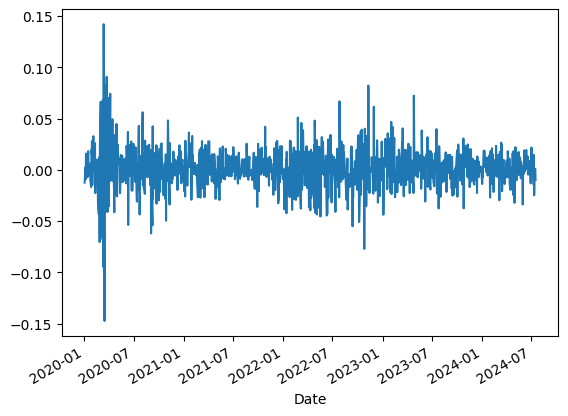

In [10]:
msft.daily_return.plot()

Over time, we see that the volatility is far from constant.

To look at the distribution, we already know which plot to utilise.

<AxesSubplot: xlabel='daily_return', ylabel='Count'>

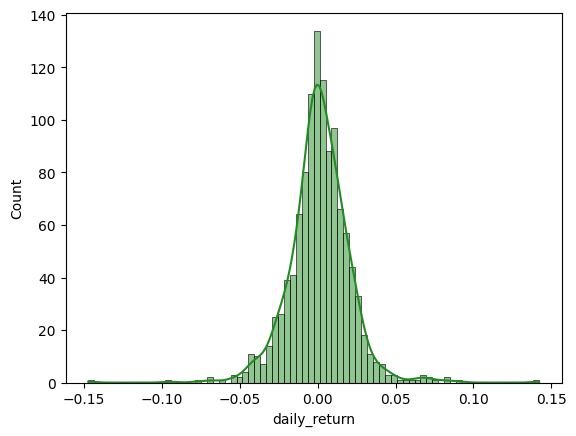

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(msft.daily_return, color='forestgreen', kde=True)

From the kernel density estimation (solid line), we see the left-skewedness of the distribution. 